# ***PROJETO DE APRENDIZADO DE MAQUINA***
**esse projeto utiliza do metodo machine learning Random Forest para poder classificar vinhos bons de ruins***



é realizado os seguintes passos:

#1- leitura e analise.

#2- Normalizaçao dos dados.

#3- trainamento do modelos.

#4- dump do modelo em um arquivo para facilitar a leitura e implementaçao da interface de usuario.

In [1]:
import pandas as pd
import seaborn as sns
import joblib
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier


### 1- leitura e analise.

In [2]:
wine  = pd.read_csv('WineQT.csv')

In [3]:
wineDF  = pd.read_csv('WineQT.csv')

<AxesSubplot:>

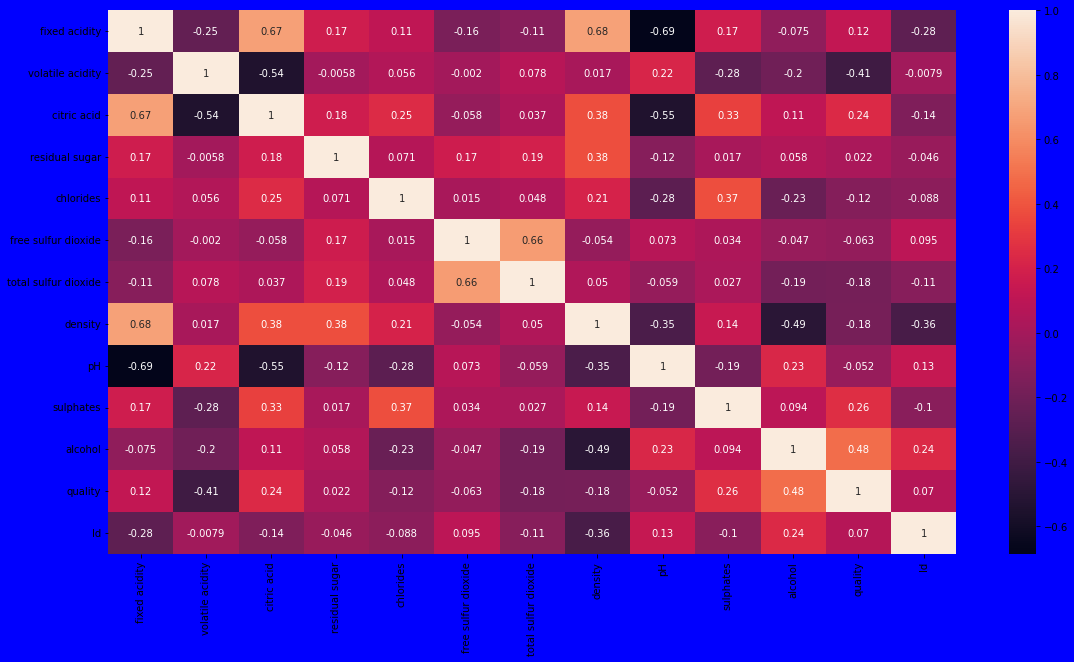

In [4]:
plt.figure(figsize=[19,10],facecolor='blue')
sns.heatmap(wineDF.corr(),annot=True)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

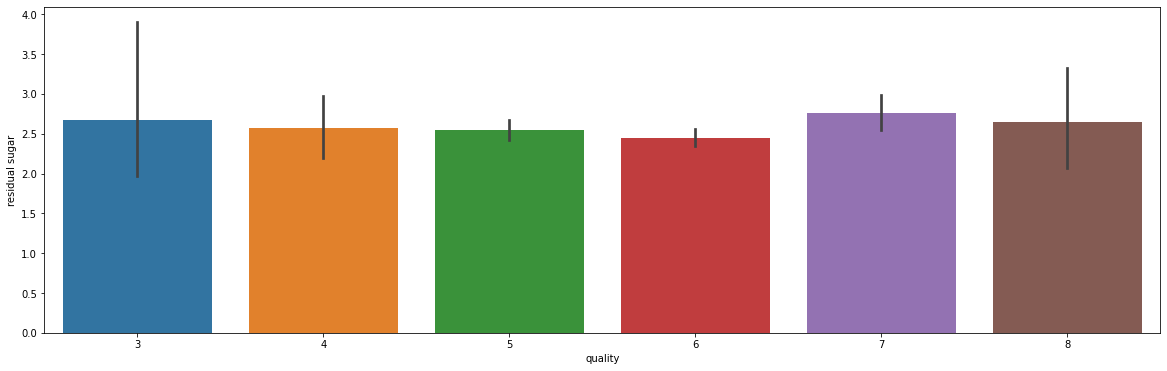

In [5]:
fig = plt.figure(figsize = (20,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

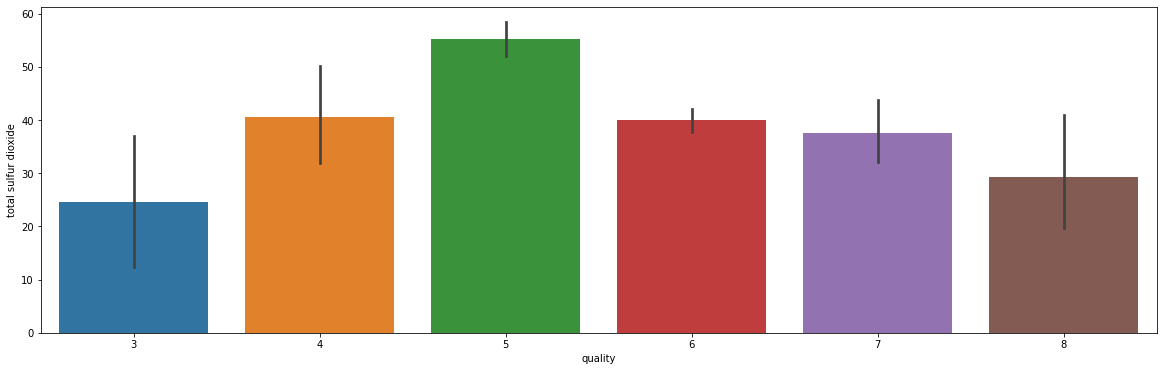

In [6]:
fig = plt.figure(figsize = (20,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

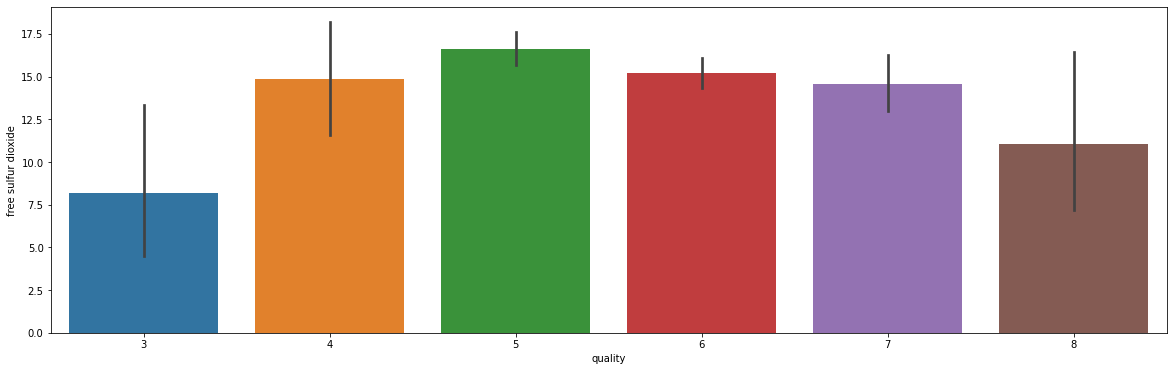

In [7]:
fig = plt.figure(figsize = (20,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

### dados correlacionados a qualidade.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

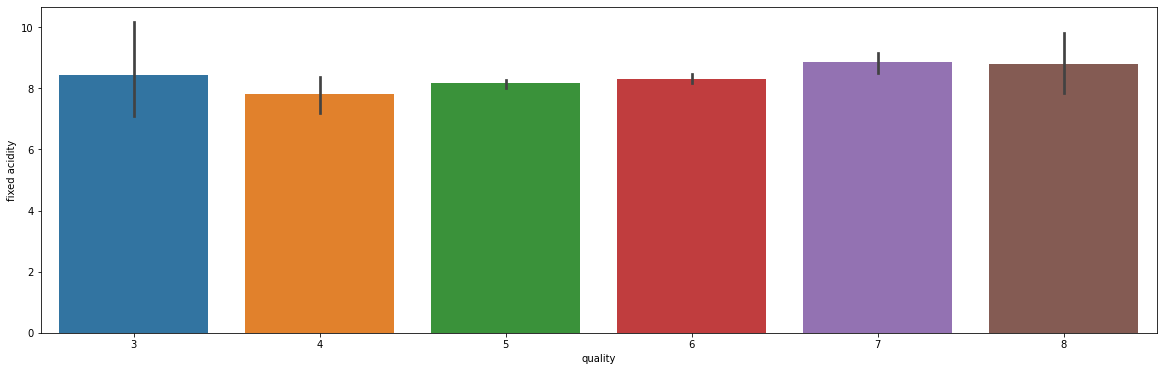

In [8]:
fig = plt.figure(figsize = (20,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

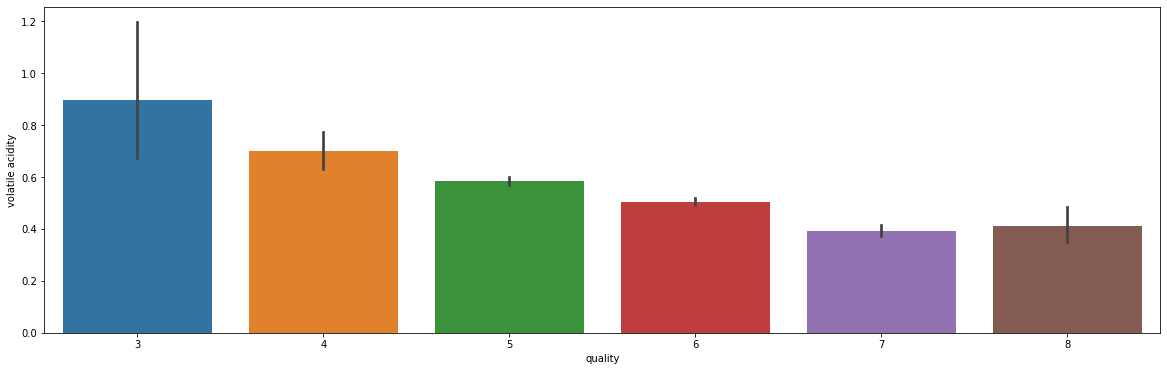

In [9]:
fig = plt.figure(figsize = (20,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

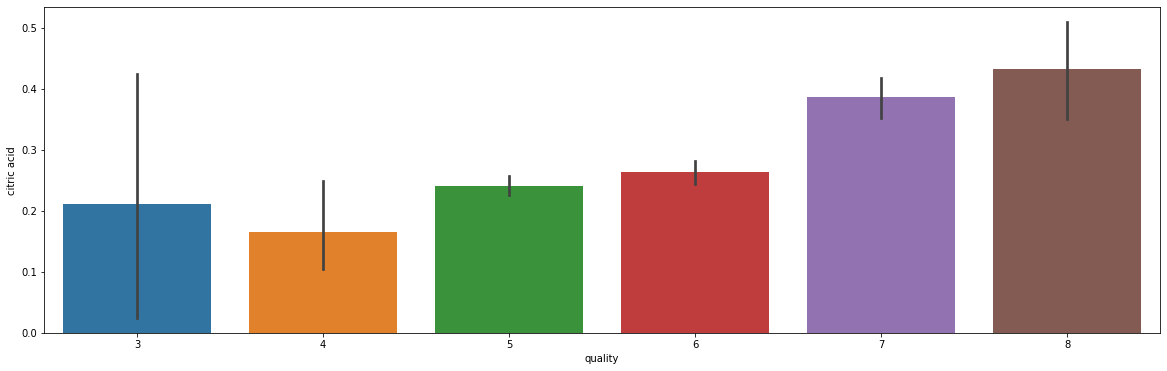

In [10]:
fig = plt.figure(figsize = (20,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

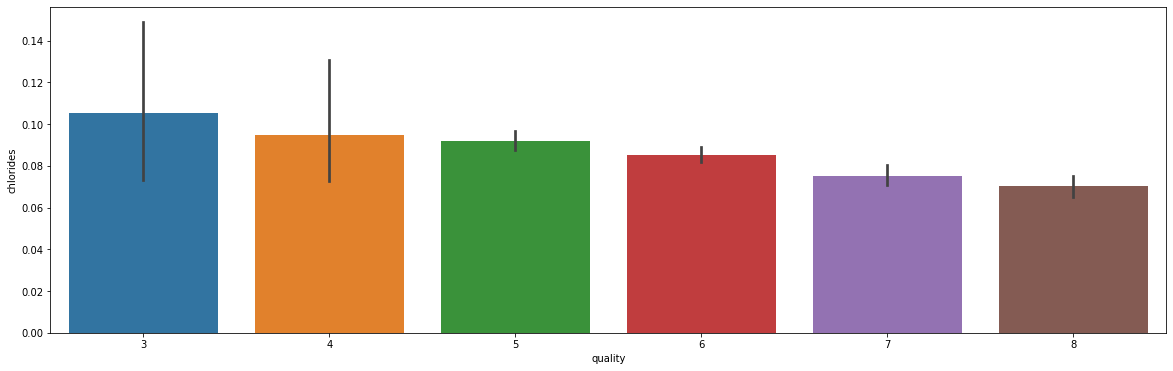

In [11]:
fig = plt.figure(figsize = (20,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

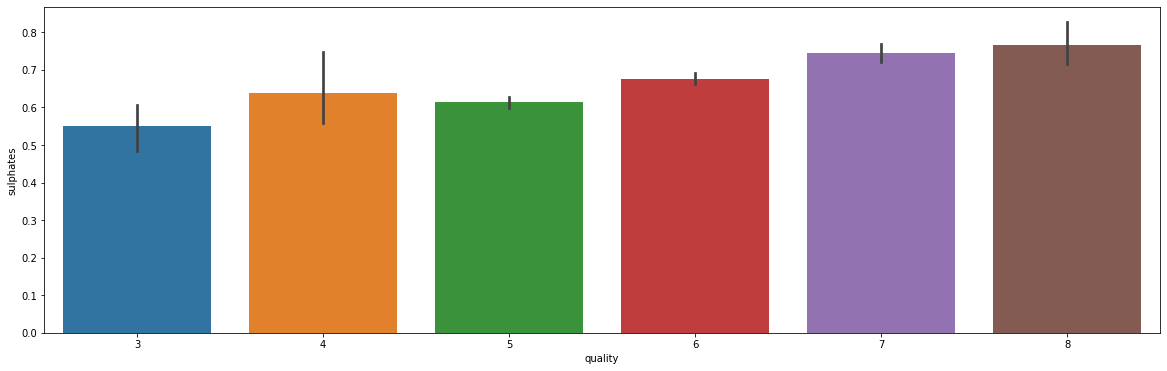

In [12]:
fig = plt.figure(figsize = (20,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

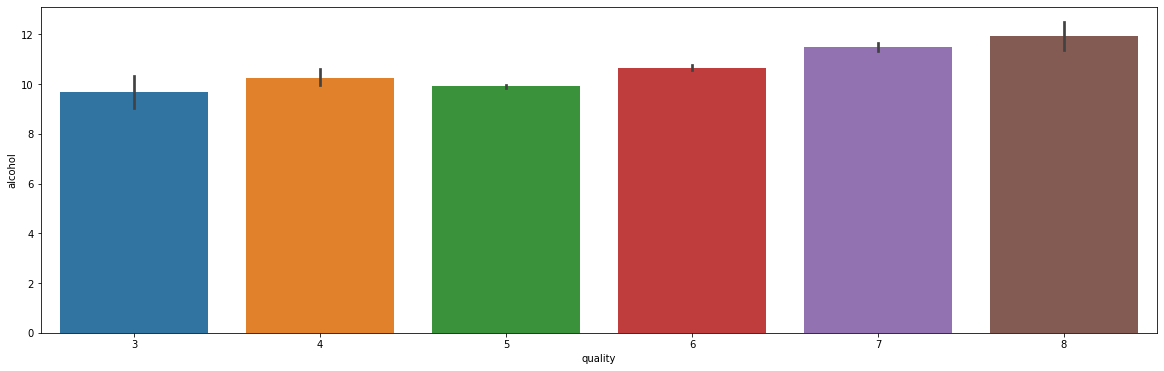

In [13]:
fig = plt.figure(figsize = (20,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

### 2- Normalizaçao dos dados.

In [14]:
bins = (2, 6.5, 8)

group_names = ['Bad', 'Good']

wineDF['quality'] = pd.cut(wineDF['quality'], bins = bins, labels = group_names)

In [15]:
label_quality = LabelEncoder()

In [16]:
X = wineDF.drop(['quality','Id','free sulfur dioxide','residual sugar','total sulfur dioxide'] ,axis = 1)
y = wineDF['quality']

### 3- trainamento do modelo.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
sc = StandardScaler()

In [19]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 4- Treinamento e dump do modelo

In [20]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [21]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

         Bad       0.95      0.96      0.95       201
        Good       0.67      0.64      0.65        28

    accuracy                           0.92       229
   macro avg       0.81      0.80      0.80       229
weighted avg       0.92      0.92      0.92       229



In [22]:
Dtc = DecisionTreeClassifier()
Dtc.fit(X_train, y_train)
pred_Dtc = Dtc.predict(X_test)

In [24]:
print(classification_report(y_test, pred_Dtc))

              precision    recall  f1-score   support

         Bad       0.93      0.88      0.90       201
        Good       0.36      0.50      0.42        28

    accuracy                           0.83       229
   macro avg       0.64      0.69      0.66       229
weighted avg       0.86      0.83      0.84       229

